In [526]:
from pyedflib import highlevel
import numpy as np
import pandas as pd
import peakutils

In [527]:
import matplotlib.pyplot as plt

In [528]:
signals, signal_headers, header = highlevel.read_edf('Documents/Tani_eeg/edffiles/WTF48N_FPT_EDF.edf')

In [531]:
a=signals[0]
b=signals[1]
c=signals[2]
r=c

In [532]:
Fs=2000

In [533]:
fft_freq=[]
fft_vals=[]
baseline_values=[]
# Get frequencies for amplitudes in Hz
for i in range(len(signals)):
    fft_freq.append(np.fft.rfftfreq(len(signals[i]), 1.0/Fs))
    fft_vals.append(np.absolute(np.fft.rfft(signals[i])))
    baseline_values = peakutils.baseline(signals[i])
    t=np.arange(len(signals[i]))

In [534]:
# Define EEG bands
eeg_bands = {'Delta': (0.5, 4),
             'Theta': (4, 8),
             'Alpha': (8, 13),
             'Beta': (13, 30),
             'Low Gamma': (30,60),
            'High Gamma': (60,100)}

In [535]:
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])


ax = df.T.plot(kind='bar',label='band',color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6'])
ax.set_xlabel("EEG band",size=16)
ax.set_ylabel("Mean band Amplitude",size=16)

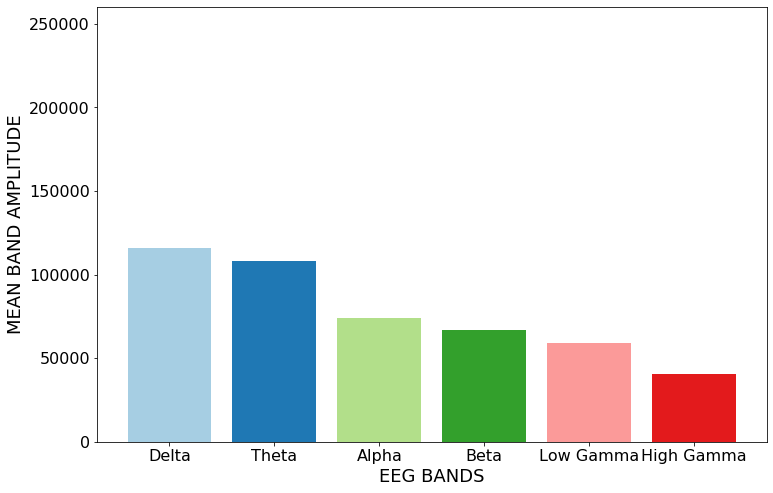

In [536]:
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
eeg_bands_xticks=['Delta','Theta','Alpha','Beta','Low Gamma','High Gamma']
eeg_bands_xticks_num=[0,1,2,3,4,5]
plt.figure(figsize=(12, 8))
ax=plt.bar(range(len(df)), df["val"], label=df['band'],color=plt.cm.Paired(np.arange(len(df))))
plt.xlabel('EEG BANDS',size=18)
plt.ylabel('MEAN BAND AMPLITUDE',size=18)
plt.xticks(eeg_bands_xticks_num,eeg_bands_xticks,size=16)
plt.yticks(size=16)
plt.ylim(0,260000)
plt.show()

In [537]:
df

,band,val
0,Delta,115912.523521
1,Theta,108348.572864
2,Alpha,73864.016279
3,Beta,66955.576605
4,Low Gamma,58858.294572
5,High Gamma,40548.397034


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


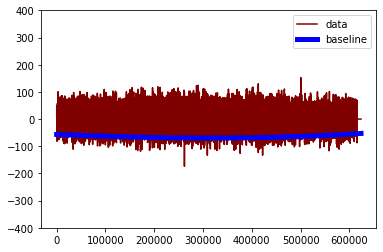

In [538]:
plt.plot(t,r,color='maroon',label='data')
plt.plot(t,baseline_values,color='blue',linewidth=5,label='baseline')
plt.ylim(-400,400)
plt.legend()